In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = '/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets'
%cd $dir

/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [ ]:
datos = loadmat("EEG-ERP-1.mat")

In [ ]:
datos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [ ]:
#Registros de encefalogramas en dos condiciones

EEGa = datos['EEGa']
EEGb = datos['EEGb']
tiempo = datos['t'][0] #Tiempo en segundos de cada ensayo

In [ ]:
print(EEGa.shape)
print(EEGb.shape)
print(tiempo.shape)

(1000, 500)
(1000, 500)
(500,)


In [ ]:
n_ensayos  = EEGa.shape[0] #Misma persona, mido 1000 veces la condición a y 1000 veces la condición b
n_muestras = EEGb.shape[1]

Text(0, 0.5, 'Voltaje [uV]')

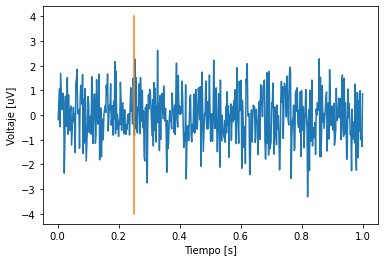

In [ ]:
#Necesitamos usar todos los ensayos para una mejor intepretación
plt.plot(tiempo,EEGa[0,:]) #Dame todas las muestras del ensayo cero
plt.plot([0.25,0.25],[-4,4]) #En qué instante de tiempo se dio el estimulo, aquí es cuando pusimos el sonido a
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [uV]')

Se puede alcanzar a ver que después del estimulo, los picos tienen una mayor amplitud

Text(0, 0.5, 'Voltaje [uV]')

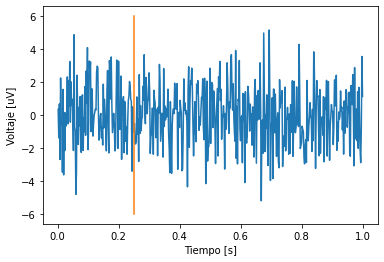

In [ ]:
#Necesitamos usar todos los ensayos para una mejor intepretación
plt.plot(tiempo,EEGb[0,:]) #Dame todas las muestras del ensayo cero
plt.plot([0.25,0.25],[-6,6]) #En qué instante de tiempo se dio el estimulo, aquí es cuando pusimos el sonido a
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [uV]')

Podemos observar que para el ensayo B, los picos tienen aún una mayor longitud


Text(0, 0.5, 'voltaje')

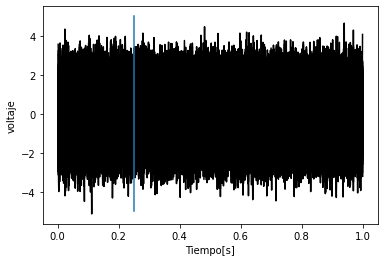

In [ ]:
#Vamos a graficar todos los ensayos de A 
for i in range(n_ensayos):
  plt.plot(tiempo,EEGa[i,:],color='black')
plt.plot([0.25,0.25],[-5,5])
plt.xlabel('Tiempo[s]')
plt.ylabel('voltaje')

No tiene sentido graficar esto, ya que no se puede interpretar nada

Otra forma de mostrar los 1000 ensayos


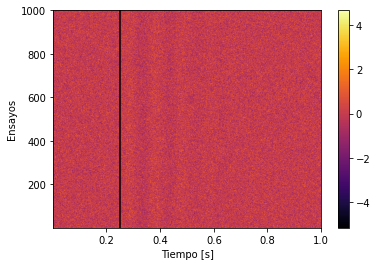

In [ ]:
plt.imshow(EEGa,cmap="inferno",
           aspect="auto",
           extent=[tiempo[0],tiempo[-1],1,n_ensayos],
           origin='lower')

plt.vlines(0.25,1,1000) #Dame la x, y los rangos de y
plt.xlabel('Tiempo [s]')
plt.ylabel('Ensayos')
plt.colorbar()

Cada fila es un ensayo, en x está el tiempo, sin embargo el voltaje está codificado en término de colores, un valor amarillo es un valor alto y el azul es un voltajr negativo

- Se pueden observar que después de la línea donde se mandó el estimulo, hay variaciones de voltaje, con base en los colores, el voltaje sube y baja

Text(0, 0.5, 'voltaje')

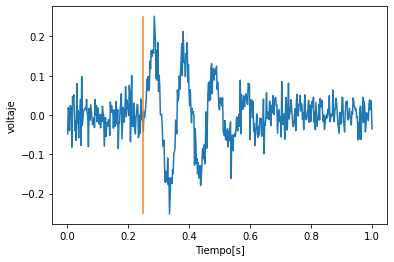

In [ ]:
plt.plot(tiempo,EEGa.mean(0))
plt.plot([0.25,0.25],[-0.25,0.25])
plt.xlabel('Tiempo[s]')
plt.ylabel('voltaje')

Esta gráfica es la media del voltaje para cada instante de tiempo de los 1000 registros de A

In [ ]:
mn_a = EEGa.mean(0)
sd_a = EEGa.std(0)
sem_a = sd_a/np.sqrt(n_ensayos)

(array([  8.,  13.,  34.,  87., 101., 103.,  85.,  48.,  16.,   5.]),
 array([-2.87350266, -2.30981314, -1.74612363, -1.18243411, -0.6187446 ,
        -0.05505508,  0.50863443,  1.07232395,  1.63601346,  2.19970298,
         2.76339249]),
 <a list of 10 Patch objects>)

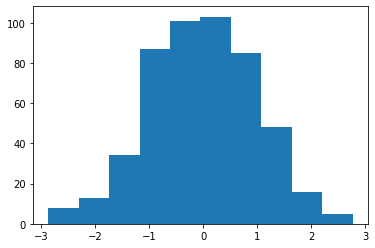

In [ ]:
plt.hist(EEGa[5,:]) #Dame todos los voltajes del ensayo 5

(array([  5.,  23.,  75., 119., 194., 227., 188., 109.,  44.,  16.]),
 array([-3.08183779, -2.50570038, -1.92956297, -1.35342556, -0.77728814,
        -0.20115073,  0.37498668,  0.95112409,  1.52726151,  2.10339892,
         2.67953633]),
 <a list of 10 Patch objects>)

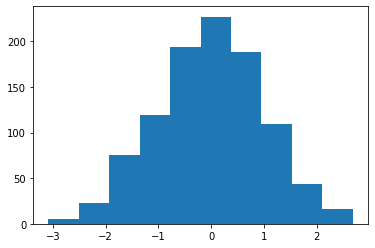

In [ ]:
plt.hist(EEGa[:,100]) #Dame todos los voltajes del segundo 100

Text(0.5, 1.0, 'ERP de la condición A')

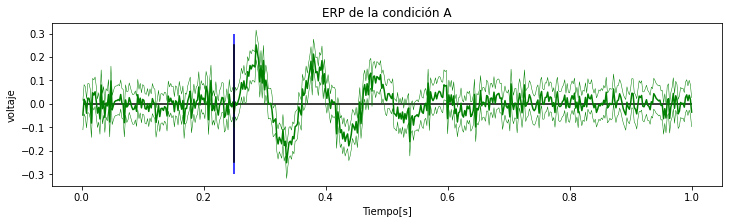

In [ ]:
mn_a = EEGa.mean(0)
sd_a = EEGa.std(0)
sem_a = sd_a/np.sqrt(n_ensayos)

_,ax = plt.subplots(figsize=(12,3))

ax.plot(tiempo,mn_a,color="green")
ax.plot(tiempo,mn_a+(2*sem_a),color="green",linewidth=0.5)
ax.plot(tiempo,mn_a-(2*sem_a),color="green",linewidth=0.5)

ax.hlines(0,tiempo[0],tiempo[-1],color="black")
ax.vlines(0.25,-0.3,0.3,color="blue")

plt.xlabel('Tiempo[s[')
plt.ylabel('voltaje')
plt.plot([0.25,0.25],[-0.25,0.25],color='black')
plt.xlabel('Tiempo[s]')
plt.ylabel('voltaje')
plt.title("ERP de la condición A")

Text(0.5, 1.0, 'ERP de la condición B')

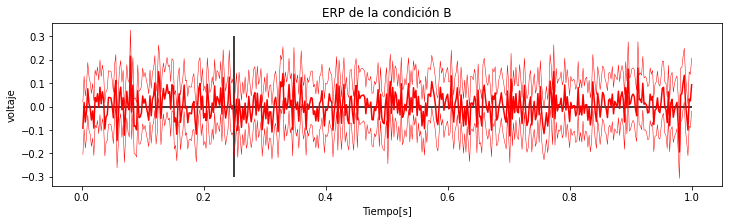

In [ ]:
mn_b = EEGb.mean(0)
sd_b = EEGb.std(0)
sem_b = sd_b/np.sqrt(n_ensayos)

_,ax = plt.subplots(figsize=(12,3))

ax.plot(tiempo,mn_b,color="red")
ax.plot(tiempo,mn_b+(2*sem_b),color="red",linewidth=0.5)
ax.plot(tiempo,mn_b-(2*sem_b),color="red",linewidth=0.5)

ax.hlines(0,tiempo[0],tiempo[-1],color="black")
ax.vlines(0.25,-0.3,0.3,color="black")

plt.xlabel('Tiempo[s[')
plt.ylabel('voltaje')
plt.xlabel('Tiempo[s]')
plt.ylabel('voltaje')
plt.title("ERP de la condición B")

Text(0, 0.5, 'voltaje')

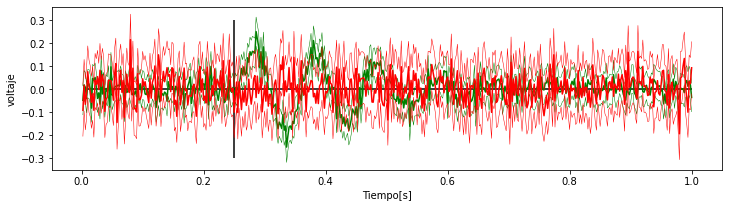

In [ ]:
_,ax = plt.subplots(figsize=(12,3))

ax.plot(tiempo,mn_a,color="green")
ax.plot(tiempo,mn_a+(2*sem_a),color="green",linewidth=0.5)
ax.plot(tiempo,mn_a-(2*sem_a),color="green",linewidth=0.5)

ax.plot(tiempo,mn_b,color="red")
ax.plot(tiempo,mn_b+(2*sem_b),color="red",linewidth=0.5)
ax.plot(tiempo,mn_b-(2*sem_b),color="red",linewidth=0.5)

ax.hlines(0,tiempo[0],tiempo[-1],color="black")
ax.vlines(0.25,-0.3,0.3,color="black")


plt.xlabel('Tiempo[s]')
plt.ylabel('voltaje')


¿Hay diferencia significativa en la respuesta del electrodo a los eventos a y b?

Text(0, 0.5, 'voltaje')

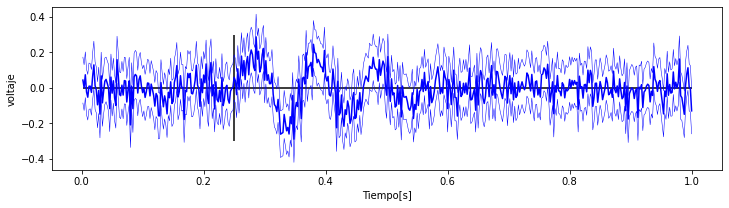

In [ ]:
_,ax = plt.subplots(figsize=(12,3))

mn_d  = mn_a-mn_b
sem_d = np.sqrt(sem_a**2+sem_b**2)

ax.plot(tiempo,mn_d,color="blue")
ax.plot(tiempo,mn_d+(2*sem_d),color="blue",linewidth=0.5)
ax.plot(tiempo,mn_d-(2*sem_d),color="blue",linewidth=0.5)

ax.hlines(0,tiempo[0],tiempo[-1],color="black")
ax.vlines(0.25,-0.3,0.3,color="black")


plt.xlabel('Tiempo[s]')
plt.ylabel('voltaje')

In [ ]:
np.random.randint(0,10)

4

In [ ]:
#Haremos un remuestreo

In [ ]:
i=np.random.randint(0,n_ensayos,size=n_ensayos)
#Remuestreo del encefalograma
EEG_rm_a = EEGa[i,:]
mn_rm_a = EEG_rm_a.mean(0)
ERP_a_1 = mn_rm_a

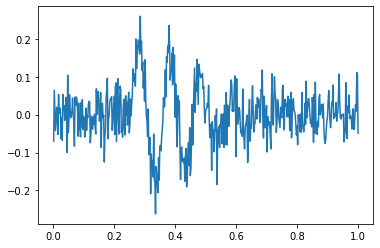

In [ ]:
plt.plot(tiempo,ERP_a_1)

In [ ]:
i=np.random.randint(0,n_ensayos,size=n_ensayos)
EEG_rm_a = EEGa[i,:]
mn_rm_a = EEG_rm_a.mean(0)
ERP_a_2 = mn_rm_a

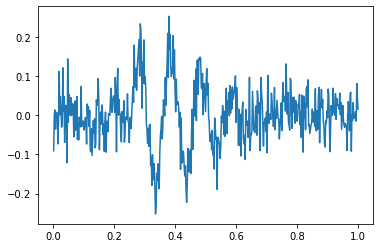

In [ ]:
plt.plot(tiempo,ERP_a_2)

In [ ]:
def bootstap_ERP(EEG,tam=None):
  n_ensayos=len(EEG)
  if tam==None:
    tam=n_ensayos
  i=np.random.randint(0,n_ensayos,size=tam)
  EEG_rm = EEG[i,:]
  return EEG_rm.mean(0)

In [ ]:
EEG_sub = np.zeros((1000,500))
for i in range(1000):
  EEG_sub[i,:]=bootstap_ERP(EEGa,tam=3000)

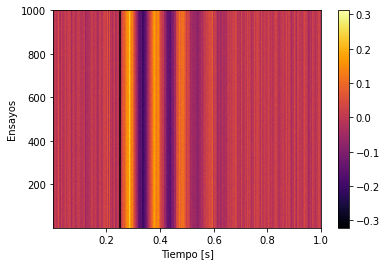

In [ ]:
plt.imshow(EEG_sub,cmap="inferno",
           aspect="auto",
           extent=[tiempo[0],tiempo[-1],1,n_ensayos],
           origin='lower')

plt.vlines(0.25,1,1000) #Dame la x, y los rangos de y
plt.xlabel('Tiempo [s]')
plt.ylabel('Ensayos')
plt.colorbar()

In [ ]:
EEG_sub_a = EEG_sub 

In [ ]:
EEG_sub_a.sort(axis=0)
EEG_sub_a

array([[-0.09815023, -0.04261811, -0.04652497, ..., -0.0362055 ,
        -0.04134659, -0.08858527],
       [-0.09707865, -0.033701  , -0.04178067, ..., -0.01061385,
        -0.0384191 , -0.08776634],
       [-0.09591606, -0.03320846, -0.03890068, ..., -0.00843214,
        -0.03765031, -0.08685984],
       ...,
       [ 0.00078462,  0.06702343,  0.06472148, ...,  0.08832441,
         0.07178354,  0.01351924],
       [ 0.0045464 ,  0.06833801,  0.06561833, ...,  0.0906247 ,
         0.07535086,  0.01630153],
       [ 0.00608893,  0.07062671,  0.06943578, ...,  0.10074865,
         0.07678175,  0.01748141]])

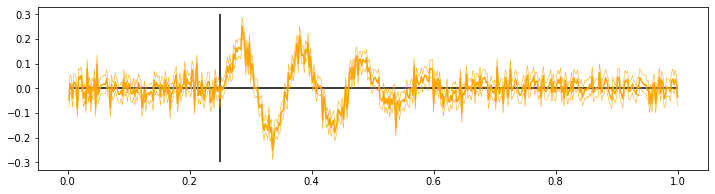

In [ ]:
EEG_sub_a.sort(axis=0)
N=len(EEG_sub_a)
ic_inf = EEG_sub_a[int(0.025*N)]
ic_sup = EEG_sub_a[int(0.975*N)]

mn_a = EEGa.mean(0)

_,ax = plt.subplots(figsize=(12,3))

ax.plot(tiempo,mn_a,color="orange")
ax.plot(tiempo,ic_inf,color="orange",linewidth=0.5)
ax.plot(tiempo,ic_sup,color="orange",linewidth=0.5)

ax.hlines(0,tiempo[0],tiempo[-1],color="black")
ax.vlines(0.25,-0.3,0.3,color="black")

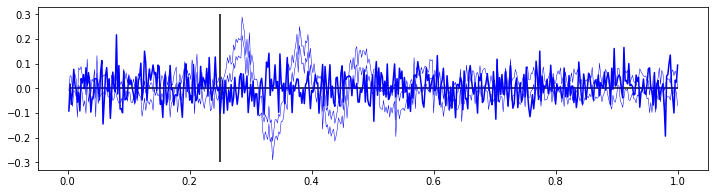

In [ ]:
EEG_sub = np.zeros((1000,500))
for i in range(1000):
  EEG_sub[i,:]=bootstap_ERP(EEGa,tam=3000)
EEG_sub_b = EEG_sub 
EEG_sub_b.sort(axis=0)
N=len(EEG_sub_b)
ic_inf = EEG_sub_b[int(0.025*N)]
ic_sup = EEG_sub_b[int(0.975*N)]

mn_b = EEGb.mean(0)

_,ax = plt.subplots(figsize=(12,3))

ax.plot(tiempo,mn_b,color="blue")
ax.plot(tiempo,ic_inf,color="blue",linewidth=0.5)
ax.plot(tiempo,ic_sup,color="blue",linewidth=0.5)

ax.hlines(0,tiempo[0],tiempo[-1],color="black")
ax.vlines(0.25,-0.3,0.3,color="black")

In [ ]:
#¿Hay diferencia significativa en la respuesta del electrodo a los eventos a y b?

In [ ]:
mn_a=np.mean(EEGa,axis=0)
mn_b=np.mean(EEGb,axis=0)
mn_d=mn_a-mn_b
estadistico=np.max(np.abs(mn_d)) #Esta es la diferencia más grande que hay
                                 #entre los registros

In [ ]:
estadistico

0.28841486379445447

In [ ]:
#Mezclamos EEGa y EEGb, hacemos uno solo
EEG = np.vstack((EEGa,EEGb))
EEG.shape

(2000, 500)

In [ ]:
#Obten un EERP con la función de bootstrap
mn_sub_a=bootstap_ERP(EEG,tam=1000)
mn_sub_b=bootstap_ERP(EEG,tam=1000)
mn_sub_d=mn_sub_a-mn_sub_b
estadistico_sub=np.max(np.abs(mn_sub_d))
estadistico_sub

0.237371189177353

In [ ]:
#Calcular 3000 veces el estadístico subrogado de arriba
#Graficar el histograma de estos valores
#Poner en el histograma una lineal vertical en el valor de 'x' correspondiente al estadístico real
#¿En qué percentil se encuentra el dato real?

lista_estadistico_sub=[]
for i in range(3000):
  mn_sub_a=bootstap_ERP(EEG,tam=1000)
  mn_sub_b=bootstap_ERP(EEG,tam=1000)
  mn_sub_d=mn_sub_a-mn_sub_b
  estadistico_sub=np.max(np.abs(mn_sub_d))
  estadistico_sub
  lista_estadistico_sub.append(estadistico_sub)

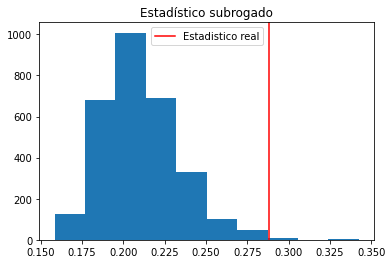


El estadistico real es: 0.28841486379445447

El percentil 99 es: 0.27618513289992497

El percentil 100 es: 0.34248817259796793

Por lo tanto el dato real se encuentra en el percentil 100


In [ ]:
plt.hist(lista_estadistico_sub)
plt.title("Estadístico subrogado")
plt.axvline(x=estadistico, ymin=0, ymax=1000,color='red',label="Estadistico real")
plt.legend()
plt.show()

num_per=100

percentile = np.percentile(lista_estadistico_sub, num_per)
percentile_99 = np.percentile(lista_estadistico_sub, 99)

print("\nEl estadistico real es: {}".format(estadistico))
print("\nEl percentil {} es: {}".format(num_per-1,percentile_99))
print("\nEl percentil {} es: {}".format(num_per,percentile))
print("\nPor lo tanto el dato real se encuentra en el percentil {}".format(num_per))
